# Clássico problema do Titanic

Uma das mais famosas competições de Machine Learning do Kaggle é o problema do **Titanic**. É um desafio para iniciantes onde é preciso prever quais passageiros sobreviveriam ao desastre.

Primeira tarefa: entender os dados. 

O dataset contém as seguintes colunas:
- **PassengerId**: número de identificação do passageiro
- **Survived**: 0 se o passageiro não sobreviveu ou 1 se o passageiro sobreviveu.
- **Pclass**: classe na qual o passageiro viajou. 1 para primeira classe, 2 para segunda classe e 3 para terceira classe.
- **Name**: nome do passageiro.
- **Sex**: sexo do passageiro.
- **Age**: idade do passageiro.
- **SibSp**: quantidade de irmãos e cônjuges a bordo.
- **Parch**: quantidade de pais e filhos a bordo.
- **Tocket**: número da passagem.
- **Fare**: preço da passagem.
- **Cabin**: número da cabine do passageiro.
- **Embarked**: o porto na qual o passageiro embarcou. Três valores possíveis: C (Cherbourg), Q (Queenstown) e S (Southampton).

Todo conjunto de dados de Machine Learning vem nas formas de um conjunto de treino e de um conjunto de testes. O primeiro irá treinar o modelo e o segundo validará os dados para verificar se nosso modelo é capaz de tratar dados novos. Os dados são:
- train.csv
- test.csv




In [174]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo do dados

In [175]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [176]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
print('num de linhas do treino: ' + str(train.shape[0]))
print('num de colunas do treino: ' + str(train.shape[1]))

num de linhas do treino: 891
num de colunas do treino: 12


In [179]:
print('num de linhas do teste: ' + str(test.shape[0]))
print('num de colunas do teste: ' + str(test.shape[1]))

num de linhas do teste: 418
num de colunas do teste: 11


tipos dos dados:

In [180]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

quantidade de valores de cada coluna:

In [181]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

`Age`, `Cabin`e `Embarked` possuem uma quantidade menor de valores, o que signific que contém valores nulos.

# Análise

In [182]:
train['Not Survived'] = train['Survived'].map({0:1, 1:0})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Not Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [183]:
print('sobreviveram: ' + str(train['Survived'].value_counts()[1]))
print('não sobreviveram: ' + str(train['Survived'].value_counts()[0]))

sobreviveram: 342
não sobreviveram: 549


Text(0, 0.5, '')

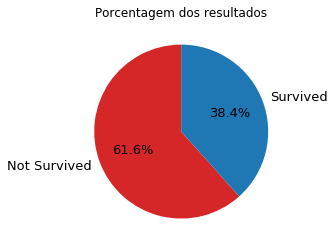

In [184]:
train['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),
                                             title='Porcentagem dos resultados',
                                             fontsize=13, shadow=False, startangle=90, autopct="%1.1f%%",
                                             labels=('Not Survived', 'Survived'),
                                             figsize=(6,4)).set_ylabel('')

## Classe

In [185]:
train.pivot_table(index='Pclass', values='Name', aggfunc='count')

,Name
Pclass,
1,216
2,184
3,491


Text(0.5, 0, 'Pclass')

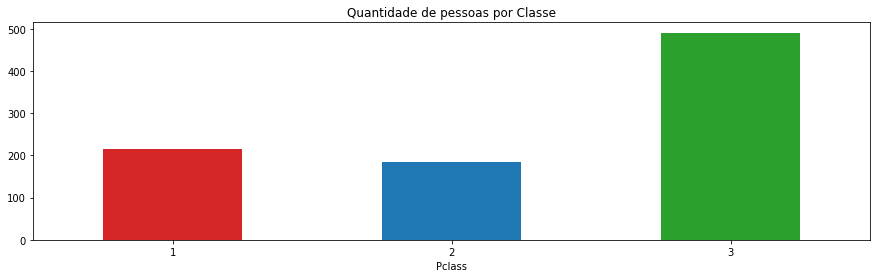

In [186]:
train.pivot_table(index='Pclass', values='Name', aggfunc='count').plot(kind='bar', legend=None, figsize=(15,4),
                                                                     title='Quantidade de pessoas por Classe',
                                                                     color=('tab:red', 'tab:blue', 'tab:green'),
                                                                     rot=0).set_xlabel('Pclass')

Quantidade de sobreviventes por classe:

In [187]:
df_survived = train.groupby('Pclass')[['Survived']].sum()

Text(0, 0.5, '')

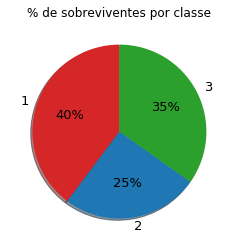

In [188]:
df_survived.apply(lambda x : (x / x.sum(axis=0))*100)['Survived'].plot.pie(fontsize=13,
                                                                          title='% de sobreviventes por classe',
                                                                          startangle=90, autopct='%1.0f%%', shadow=True,
                                                                          colors=('tab:red', 'tab:blue', 'tab:green'),
                                                                          figsize=(6,4)).set_ylabel('')

In [189]:
df_survived = train.groupby('Pclass')[['Not Survived']].sum()

Text(0, 0.5, '')

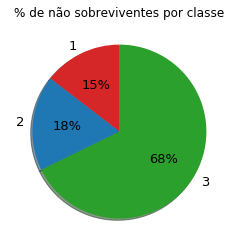

In [190]:
df_survived.apply(lambda x : (x / x.sum(axis=0))*100)['Not Survived'].plot.pie(fontsize=13,
                                                                          title='% de não sobreviventes por classe',
                                                                          startangle=90, autopct='%1.0f%%', shadow=True,
                                                                          colors=('tab:red', 'tab:blue', 'tab:green'),
                                                                          figsize=(6,4)).set_ylabel('')

Melhorando a vizualização

In [191]:
train_prop = train.pivot_table(index='Pclass', values=('Survived', 'Not Survived'), aggfunc=np.sum)

In [192]:
train_prop['Proporção de sobreviventes'] = train_prop['Survived'] / train['PassengerId'].count()
train_prop['Proporção de não sobreviventes'] = train_prop['Not Survived'] / train['PassengerId'].count()

In [193]:
train_prop.drop('Survived', axis=1, inplace=True)
train_prop.drop('Not Survived', axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


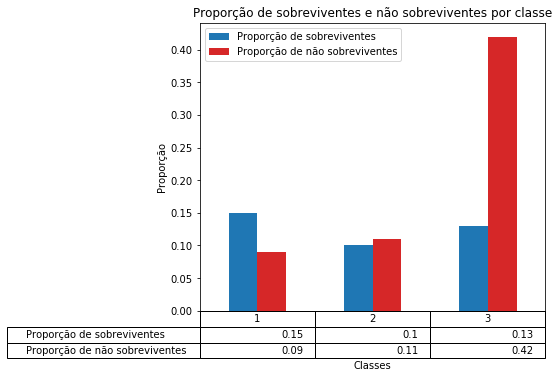

In [194]:
train_prop.round(2).plot(kind='bar', rot=0, color=('tab:blue', 'tab:red'),
                        title = 'Proporção de sobreviventes e não sobreviventes por classe',
                        table=True)
plt.ylabel('Proporção')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0]) #[left, bottom, width, height]

In [195]:
train_prop2 = train.pivot_table(index='Pclass', values=('Survived','Not Survived'), aggfunc=np.sum)

In [196]:
train_prop2['% de sobreviventes'] = train_prop2['Survived'] / (train_prop2['Survived'] + train_prop2['Not Survived'])
train_prop2['% de não sobreviventes'] = train_prop2['Not Survived'] / (train_prop2['Survived'] + train_prop2['Not Survived'])

In [197]:
train_prop2.head()

,Not Survived,Survived,% de sobreviventes,% de não sobreviventes
Pclass,,,,
1,80,136,0.629630,0.370370
2,97,87,0.472826,0.527174
3,372,119,0.242363,0.757637


In [198]:
train_prop2.drop('Survived', axis=1, inplace=True)
train_prop2.drop('Not Survived', axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


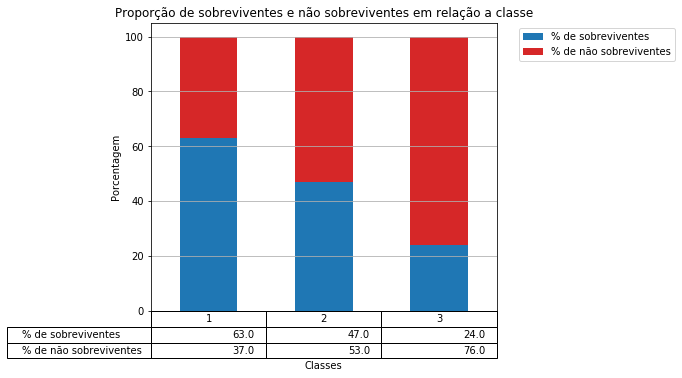

In [199]:
train_prop2.applymap(lambda x: x * 100).round(0).plot(kind='bar', color=('tab:blue', 'tab:red'),
                                                     title='Proporção de sobreviventes e não sobreviventes em relação a classe',
                                                     grid=True, table=True, rot=0, stacked=True).legend(bbox_to_anchor=(1.05, 1.0))
plt.ylabel('Porcentagem')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0])

## Sexo

Text(0, 0.5, '')

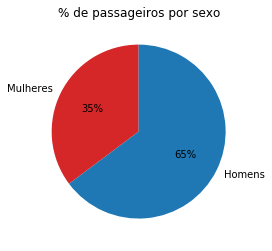

In [200]:
train.groupby('Sex').count()['PassengerId'].plot.pie(title='% de passageiros por sexo',
                                                    colors=('tab:red', 'tab:blue'), figsize=(6,4), 
                                                    labels=('Mulheres', 'Homens'), startangle=90, autopct='%1.0f%%',
                                                    shadow=False).set_ylabel('')

Text(0, 0.5, 'Qtd')

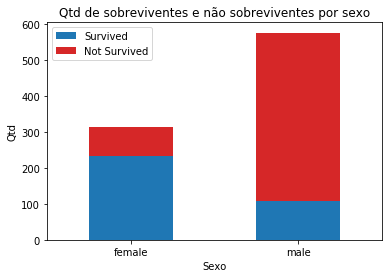

In [201]:
train.pivot_table(index='Sex', values=('Survived', 'Not Survived'), aggfunc=np.sum)[['Survived', 'Not Survived']].plot(
kind='bar', rot=0, label=('Mulher', 'Homem'),
color=('tab:blue', 'tab:red'), stacked=True,
title='Qtd de sobreviventes e não sobreviventes por sexo').set_xlabel('Sexo')
plt.ylabel('Qtd')

In [202]:
train.pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


Text(0.5, 0, 'Qtd')

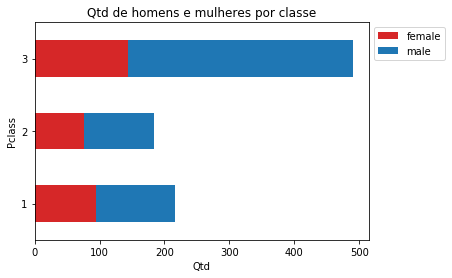

In [203]:
train.pivot_table('PassengerId', ['Pclass'], 'Sex', aggfunc='count').sort_index().plot(
kind='barh', color=('tab:red', 'tab:blue'), stacked=True,
title='Qtd de homens e mulheres por classe').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Qtd')

In [204]:
train.groupby(['Sex', 'Pclass']).sum()[['Survived', 'Not Survived']]

Survived  Not Survived
Sex    Pclass                        
female 1             91             3
       2             70             6
       3             72            72
male   1             45            77
       2             17            91
       3             47           300

Text(0.5, 0, 'Qtd')

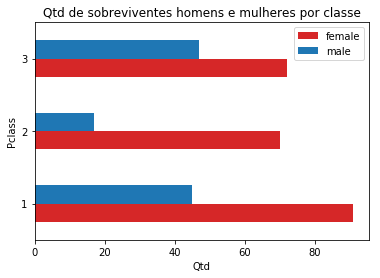

In [205]:
train[train['Survived'] == 1].pivot_table('PassengerId', ['Pclass'], 'Sex', aggfunc='count').plot(
kind='barh', color=('tab:red', 'tab:blue'),
title='Qtd de sobreviventes homens e mulheres por classe').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Qtd')

In [206]:
train1 = train[train['Survived'] == 1].pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')
train2 = train.pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')

In [207]:
train1

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [208]:
train2

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [209]:
train1.rename(index={'female': 'mulheres sobreviventes'}, inplace=True)
train1.rename(index={'male': 'homens sobreviventes'}, inplace=True)
train2.rename(index={'female': 'mulheres total'}, inplace=True)
train2.rename(index={'male': 'homens total'}, inplace=True)

In [210]:
train_res = pd.concat([train1, train2], axis=0)
train_res.sort_index(ascending=True)

Pclass,1,2,3
Sex,,,
homens sobreviventes,45,17,47
homens total,122,108,347
mulheres sobreviventes,91,70,72
mulheres total,94,76,144


Text(0.5, 0, 'Qtd')

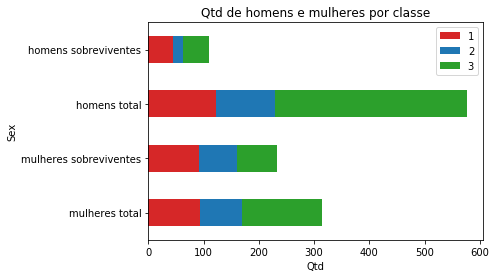

In [211]:
train_res.sort_index(ascending=False).plot(kind='barh', color=('tab:red', 'tab:blue', 'tab:green'),
                                          stacked=True, 
                                          title='Qtd de homens e mulheres por classe').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Qtd')

In [212]:
train_res2 = train_res.transpose()
train_res2

Sex,mulheres sobreviventes,homens sobreviventes,mulheres total,homens total
Pclass,,,,
1,91,45,94,122
2,70,17,76,108
3,72,47,144,347


([<matplotlib.axis.XTick at 0x1a25a012e8>,
 <a list of 3 Text xticklabel objects>)

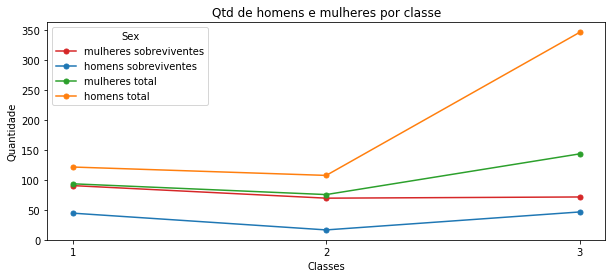

In [213]:
train_res2.sort_index(ascending=True).plot(title='Qtd de homens e mulheres por classe',
                                          figsize=(10,4), marker='o', markersize=5,
                                          color=('tab:red', 'tab:blue', 'tab:green', 'tab:orange'))
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.xlim(0.9, 3.1)
plt.xticks([1,2,3])

In [214]:
train.pivot_table(index=('Sex', 'Pclass'), values=('Survived', 'Not Survived'), aggfunc=np.sum)[['Survived', 'Not Survived']]

Survived  Not Survived
Sex    Pclass                        
female 1             91             3
       2             70             6
       3             72            72
male   1             45            77
       2             17            91
       3             47           300

Text(0, 0.5, 'Qtd')

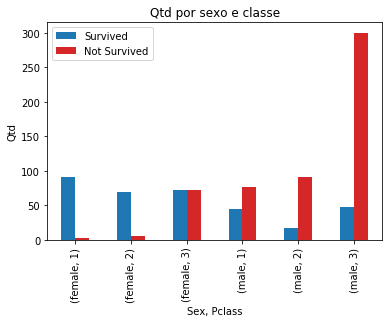

In [215]:
train.pivot_table(index=('Sex', 'Pclass'), values=('Survived', 'Not Survived'), aggfunc=np.sum)[['Survived', 'Not Survived']].plot(
kind='bar', color=('tab:blue', 'tab:red'),
title='Qtd por sexo e classe').set_xlabel('Sex, Pclass')
plt.ylabel('Qtd')

Obs.: Quase 100% da mulheres da 1a e 2a classe se salvaram

In [216]:
train.pivot_table(index=('Sex', 'Pclass'), values=('Survived', 'Not Survived'), aggfunc=np.sum)

Not Survived  Survived
Sex    Pclass                        
female 1                  3        91
       2                  6        70
       3                 72        72
male   1                 77        45
       2                 91        17
       3                300        47

In [217]:
train_mulher = train[train['Sex'] == 'female'].groupby('Pclass').agg({'Survived': ['sum'], 'Not Survived': ['sum']})

In [218]:
train_mulher['% de sobreviventes'] = ((train_mulher['Survived'] / (train_mulher['Survived'] + train_mulher['Not Survived'])) * 100)

In [219]:
train_mulher

,Survived,Not Survived,% de sobreviventes
,sum,sum,
Pclass,,,
1,91,3,96.808511
2,70,6,92.105263
3,72,72,50.000000


In [220]:
train_mulher['% de não sobreviventes'] = 100 - train_mulher['% de sobreviventes']

In [221]:
train_mulher

,Survived,Not Survived,% de sobreviventes,% de não sobreviventes
,sum,sum,,
Pclass,,,,
1,91,3,96.808511,3.191489
2,70,6,92.105263,7.894737
3,72,72,50.000000,50.000000


In [222]:
train_mulher.drop('Survived', axis=1, inplace=True)
train_mulher.drop('Not Survived', axis=1, inplace=True)

In [223]:
train_mulher

,% de sobreviventes,% de não sobreviventes
,,
Pclass,,
1,96.808511,3.191489
2,92.105263,7.894737
3,50.000000,50.000000


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


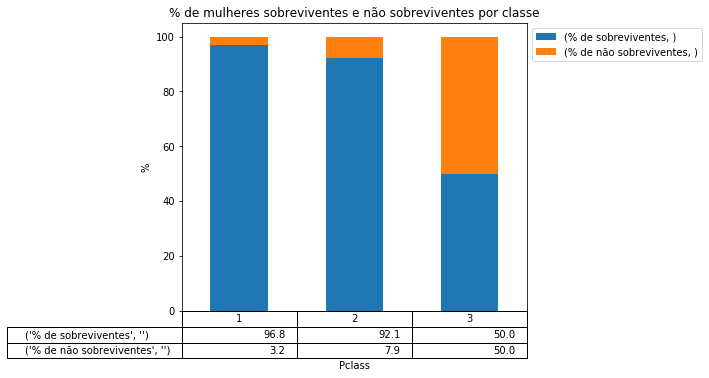

In [224]:
train_mulher.round(1).plot(kind='bar', rot=0,
                          title='% de mulheres sobreviventes e não sobreviventes por classe',
                          stacked=True, table=True).legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('%')
plt.xlabel('Pclass', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0])

## Idade

In [225]:
print('passageiros sem idade preenchida: ', train['Age'].isnull().sum())
print('passageiros com idade preenchida: ', (~train['Age'].isnull()).sum())

passageiros sem idade preenchida:  177
passageiros com idade preenchida:  714


Text(0, 0.5, 'Frequence')

<Figure size 432x288 with 0 Axes>

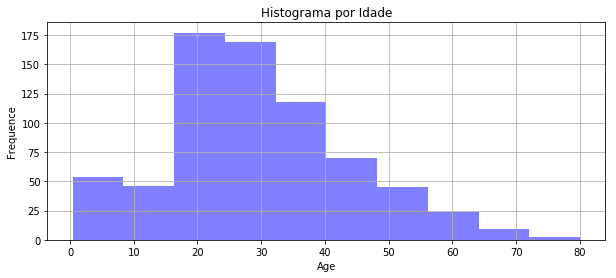

In [226]:
plt.figure()
train.hist(column='Age', color=('blue'), alpha=0.5, bins=10, figsize=(10,4))
plt.title('Histograma por Idade')
plt.xlabel('Age')
plt.ylabel('Frequence')

<Figure size 432x288 with 0 Axes>

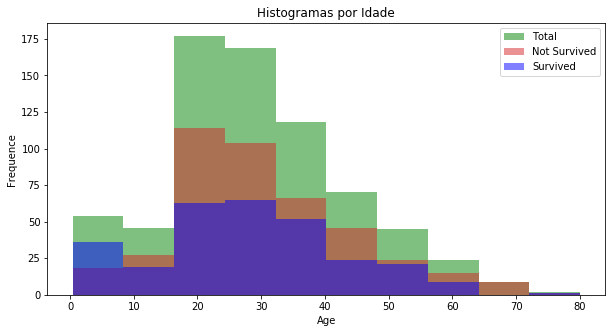

In [227]:
train_hist_age = pd.DataFrame({'Total': train['Age'],
                              'Not Survived': train[train['Not Survived'] == 1]['Age'],
                              'Survived': train[train['Survived'] == 1]['Age']},
                              columns=['Total', 'Not Survived', 'Survived'])
plt.figure()
train_hist_age.plot.hist(bins=10, alpha=0.5, figsize=(10,5), color=('green', 'tab:red', 'blue'),
                        title='Histogramas por Idade')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

([<matplotlib.axis.XTick at 0x1a25c690f0>,
 <a list of 9 Text xticklabel objects>)

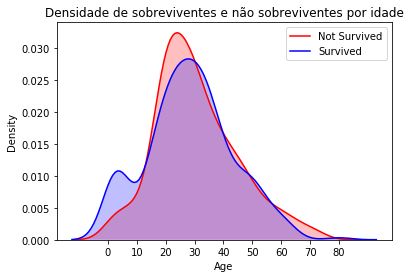

In [232]:
ax = sns.kdeplot(train_hist_age['Not Survived'], shade=True, color='r')
ax = sns.kdeplot(train_hist_age['Survived'], shade=True, color='b')
plt.title('Densidade de sobreviventes e não sobreviventes por idade')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks((0, 10, 20, 30, 40, 50, 60, 70, 80))

In [233]:
train_age = train.copy()

In [235]:
train_age.drop(train_age[train_age['Age'].isnull() == True].index, inplace=True)

In [238]:
train_age['Child_Adult'] = 0

In [239]:
train_age.loc[train_age[train_age['Age'] < 12].index, 'Child_Adult'] = 'Child'

In [240]:
train_age.loc[train_age[train_age['Age'] >= 12].index, 'Child_Adult'] = 'Not Child'

In [241]:
train_age.groupby('Child_Adult')[['Survived']].mean()

,Survived
Child_Adult,
Child,0.573529
Not Child,0.388545


Text(0.5, 0, '')

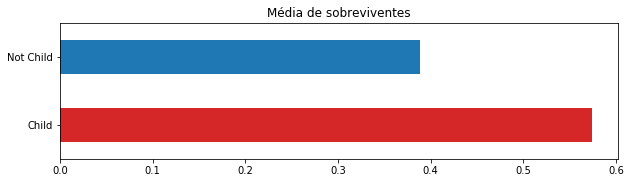

In [242]:
train_age.groupby('Child_Adult')['Survived'].mean().plot.barh(title='Média de sobreviventes',
                                                             figsize=(10,2.5),
                                                             color=('tab:red', 'tab:blue')).set_ylabel('')
plt.xlabel('')

In [243]:
train_age_grp = train_age.groupby('Child_Adult')['Survived', 'Not Survived'].sum()

In [245]:
train_age_grp

,Survived,Not Survived
Child_Adult,,
Child,39,29
Not Child,251,395


Text(0.5, 0, 'Qtd')

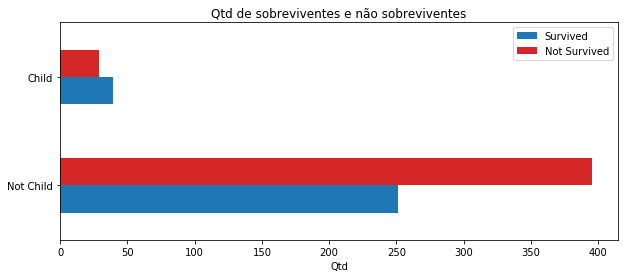

In [247]:
train_age.groupby(['Child_Adult'])['Survived', 'Not Survived'].sum().sort_values(by='Survived', ascending=False).plot(
kind='barh', figsize=(10,4), title='Qtd de sobreviventes e não sobreviventes',
color=('tab:blue', 'tab:red')).set_ylabel('')
plt.xlabel('Qtd')

In [248]:
train_child = train[(train['Age'] <= 11) & (train['Survived'] == 1)].groupby('Pclass').count()[['Survived']]
train_child_tmp = train[(train['Age'] <= 11) & (train['Survived'] == 0)].groupby('Pclass').count()[['Survived']]
result = pd.concat([train_child, train_child_tmp], axis=1)
train_child_tmp2 = train[(train['Age'] <= 11)].groupby('Pclass').count()[['Survived']]
result = pd.concat([result, train_child_tmp2], axis=1)
result.columns.values[1] = 'Not Survived'
result.columns.values[2] = 'Total'
result.fillna(0)

,Survived,Not Survived,Total
Pclass,,,
1,3,1.0,4
2,17,0.0,17
3,19,28.0,47


Text(0, 0.5, 'Qtd')

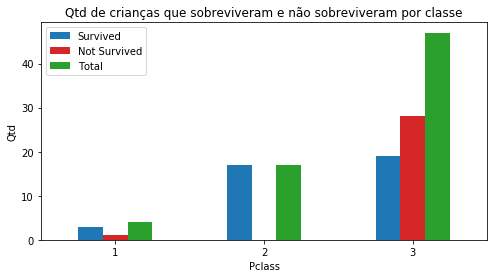

In [249]:
result.fillna(0).plot(kind='bar', rot=0, figsize=(8,4),
                     color=('tab:blue', 'tab:red', 'tab:green'),
                     title='Qtd de crianças que sobreviveram e não sobreviveram por classe')
plt.ylabel('Qtd')

In [251]:
result_perc = result.copy()
result_perc['% Not Survived'] = (result_perc['Not Survived'] / result_perc['Total']) * 100
result_perc['% Survived'] = (result_perc['Survived'] / result_perc['Total']) * 100

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


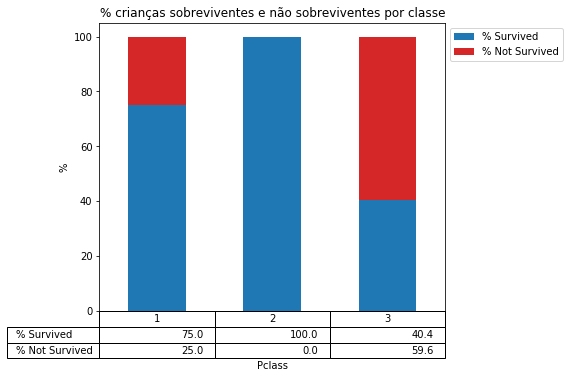

In [253]:
result_perc[['% Survived', '% Not Survived']].fillna(0).round(1).plot(kind='bar', 
                                                                      title='% crianças sobreviventes e não sobreviventes por classe',
                                                                      rot=0, stacked=True, table=True,
                                                                      color=('tab:blue', 'tab:red')).legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('%')
plt.xlabel('Pclass', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0])

In [ ]:
Portanto, 'Pclass', 'Sex' e 'Age' foram os fatores que mais influenciaram as chances de sobrevivência

# Limpando os dados

Em nosso dataset do Titanic, existem três dados irrelevantes, ou seja, informações que podemos remover dele: as colunas Name, Ticket e Cabin, ou seja, as colunas que contém o nome do passageiro, o número da passagem e da cabine, respectivamente.

Dados que são importantes para prever são, por exemplo, a classe em que a pessoa estava, seu sexo e idade.

Para remover uma coluna, utilizamos o código abaixo. Perceba que a alteração que é feita no conjunto de treino também é feita no conjunto de teste. Nunca esqueça de fazer isso, senão seu modelo apresentará erro.

In [5]:
train_copy = train.copy()
test_copy = test.copy()

train_copy.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_copy.drop(['Name', 'Ticket' , 'Cabin'], axis=1, inplace=True)

In [6]:
train_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
test_copy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


O método `drop()`remove as colunas. Como precisamos excluir mais de uma coluna ao mesmo tempo, devemos passá-las na forma de uma lista, que no Python é caracterizada pelos colchetes []. Em seguida, informamos o argumento `axis=1`, que indica que queremos retirar a coluna inteira, e não apenas uma linha. Também podemos informar o argumento `inplace=True`, se o desejo é salvar a alteração direto no dataset, sem que tenhamos que armazenar o valor em outra variável, informando, por exemplo:


``` python
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket' , 'Cabin'], axis=1, inplace=True)
```

In [69]:
train_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Números X Palavras

Em Machine Learning tudo tem que ser número! Se queremos construir um modelo preciso como este do Titanic, precisamos transformar todos os dados em números. Entretanto, nem tudo está perdido. Bibliotecas como o Pandas e Scikit-Learn possuem diversas ferramentas para nos ajudar nessa tarefa. E uma delas é a função `get_dummies()`, que aplica uma técnica de engenharia de dados conhecida como `One-hot encoding`.

### One-hot enconding

Conhecida também como `one-out-of-N encoding` ou `Dummy variable`, a técnica `One-hot encoding` transforma variáveis categóricas (que nada mais são que um dado não numérico) em números, para que fique mais fácil de utilizar em modelos de **classificação** e **regressão**.

Para utilizar o `get_dummies()`, primeiro criaremos duas variáveis — uma para cada dataset — que armazenarão o novo DataFrame devidamente codificado. Em seguida, utilizaremos a função do Pandas nos devidos conjuntos de teste e treino.

In [8]:
new_train = pd.get_dummies(train_copy)
new_test = pd.get_dummies(test_copy)

A função `get_dummies()` aceita uma série de argumentos, como informar colunas específicas que desejamos codificar. Todavia, se nada for passado nos parênteses, ela irá codificar todas as colunas não-numéricas de nosso dataset. Por sorte, os conjuntos de dados do Titanic possuem apenas duas colunas com variáveis não-numéricas: o sexo do passageiro e o porto de embarque.

Veja as primeiras linhas dos novos DataFrames após executarmos o One-hot encoding:

In [9]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


# Valores Nulos

Agora que nossos dados estão devidamente codificados, nós devemos tratar valores nulos. Esse é um passo muito importante, porque, caso hajam valores inválidos nas linhas do dataset, o modelo apresentará erro.

Precisamos saber quais linhas possuem valores nulos, ou NaN (_Not a Number_):

In [11]:
new_train.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64

In [12]:
new_test.isnull().sum().sort_values(ascending=False).head(10)

Age           86
Fare           1
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Parch          0
SibSp          0
Pclass         0
dtype: int64

In [13]:
new_train.fillna(new_train['Age'].mean(), inplace=True)

In [14]:
new_train.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [15]:
new_test.fillna(new_test['Age'].mean(), inplace=True)
new_test.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

# Árvore de decisão

O algoritmo de Árvore de Decisão é muito parecido com um fluxograma. A ideia é levantar as perguntas pertinentes para resolução do problema e definir caminhos a partir das respostas. Por exemplo: "O passageiro tem mais do que 18 anos?", "É da primeira classe?" ou "É mulher?". Essas são perguntas pertinentes para o modelo já que no desastre do Titanic a maioria dos sobreviventes foram crianças, mulheres e passageiros da primeira classe.

Portanto, faremos essas três perguntas começando pela idade. Se o passageiro era maior do que 18 anos, a probabilidade de ter sobrevivido é que seja do sexo feminino. Caso o passageiro seja menor, perguntaremos se era da primeira classe, já que as crianças com maior probabilidade de terem sobrevivido eram da primeira classe.

Informaremos ao nosso modelo quais são os dados de aprendizagem (X) e o que queremos prever (y). Precisamos prever os sobreviventes:

In [24]:
X = new_train.drop('Survived', axis=1)
y = new_train['Survived']
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Agora criamos a árvore de decisão. Passamos o parâmetro `max_depth`para definir a profundidade da árvore, ou seja, quantas perguntas serão feitas. 

In [26]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [27]:
tree.score(X, y)

0.8271604938271605

Temos um precisão de 82%. Agora aplicamos o modelo nos dados de testes e submetemos a resposta em um arquivo .csv:

In [33]:
submissao = pd.DataFrame()
submissao['PassengerId'] = new_test['PassengerId']
submissao['Survived'] = tree.predict(new_test)

In [34]:
submissao.to_csv('submissao.csv', index=False)

# Totais

In [35]:
submissao.count()

PassengerId    418
Survived       418
dtype: int64

In [51]:
#submissao['Not Survived'] = submissao['Survived'].map({0:1, 1:0})
print('sobreviveram: ' + str(submissao['Survived'].value_counts()[1]))
print('não sobreviveram: ' + str(submissao['Survived'].value_counts()[0]))

sobreviveram: 150
não sobreviveram: 268


Text(0, 0.5, '')

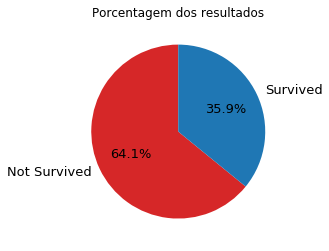

In [56]:
submissao['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),
                                             title='Porcentagem dos resultados',
                                             fontsize=13, shadow=False, startangle=90, autopct="%1.1f%%",
                                             labels=('Not Survived', 'Survived'),
                                             figsize=(6,4)).set_ylabel('')